Step1: 

Downloading of data from IQFeed

"SPY","DIA","QQQ","IWM","^GSPC",'^NDX','^OEX','^VIX','UWTI','DWTI','SQQQ','TQQQ','XLE','XLF','XLV','XLY','XLI','TLT','SST','EEM','CAD=X'

In [3]:
%run iqfeed_download.py#USDCAD,VIX and SPX not loading

ERROR: File `u'iqfeed_download.py#USDCAD,VIX.py'` not found.


Step 2:

    F1: Price-Volume convegence or divergence
    
    F2: Volatility
    
    F3: Technicals
    
    F4: Regression
    
    F5: Descriptive Analysis

Step 3:TIME series prediction:

1. ARIMA prediction

2. Garch Prediction

3. SVM regression 

4. Naive Bayes

5. Logit

6. HMM: HMMs can be used in two ways for regime detection, the first is to use a single HMM where each state in the HMM is considered a “regime”. The second method is to have multiple HMMs each designed to model an individual regime, the task is then to chose between models by looking at which is the most likely to have generated the data.

Prediction of SPY

In [7]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
path = '/home/octo/Desktop/PROJECT/DATA/MIN/'

In [9]:
SPY=pd.read_csv(path + 'SPY.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

GARCH

In [10]:
import pandas as pd
import bt
import arch #pip install git+git://github.com/bashtage/arch.git

In [14]:
SPY['pct_change'] = SPY['close'].pct_change().dropna()

In [16]:
SPY['stdev21'] = pd.rolling_std(SPY['pct_change'], 21)

In [21]:
SPY['hvol21'] =SPY['stdev21']*(120**0.5) # 10 min wise

In [22]:
SPY['variance'] = SPY['hvol21']**2

In [24]:
SPY = SPY.dropna() # Remove rows with blank cells.

In [26]:
SPY.head()

,high,low,open,close,total_volume,volume,pct_change,stdev21,hvol21,variance
2016-07-15 09:31:50,216.700,216.6700,216.690,216.691,4701911,25073,0.000051,0.000152,0.001663,2.765346e-06
2016-07-15 09:31:55,216.710,216.6900,216.700,216.705,4722426,19796,0.000065,0.000122,0.001338,1.790448e-06
2016-07-15 09:32:00,216.710,216.6845,216.702,216.700,4743076,20295,-0.000023,0.000119,0.001303,1.698021e-06
2016-07-15 09:32:05,216.714,216.6800,216.710,216.680,4812171,68317,-0.000092,0.000086,0.000940,8.826762e-07
2016-07-15 09:32:10,216.690,216.6700,216.680,216.670,4833826,20855,-0.000046,0.000083,0.000914,8.355572e-07


In [31]:
returns = SPY['pct_change']
am = arch.arch_model(returns)
res = am.fit(5)
res.params

Inequality constraints incompatible    (Exit mode 4)
            Current function value: -791968.887278
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1


/home/octo/anaconda2/envs/PyAlgo/lib/python2.7/site-packages/arch/univariate/base.py:510: ConvergenceWarning: 
The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


2016-07-15 09:31:50    0.000055
2016-07-15 09:31:55    0.000056
2016-07-15 09:32:00    0.000054
2016-07-15 09:32:05    0.000059
2016-07-15 09:32:10    0.000058
2016-07-15 09:32:15    0.000057
2016-07-15 09:32:20    0.000054
2016-07-15 09:32:25    0.000051
2016-07-15 09:32:30    0.000051
2016-07-15 09:32:35    0.000048
2016-07-15 09:32:40    0.000046
2016-07-15 09:32:45    0.000044
2016-07-15 09:32:50    0.000045
2016-07-15 09:32:55    0.000052
2016-07-15 09:33:00    0.000058
2016-07-15 09:33:05    0.000055
2016-07-15 09:33:10    0.000054
2016-07-15 09:33:15    0.000058
2016-07-15 09:33:20    0.000056
2016-07-15 09:33:25    0.000057
2016-07-15 09:33:30    0.000058
2016-07-15 09:33:35    0.000060
2016-07-15 09:33:40    0.000059
2016-07-15 09:33:45    0.000056
2016-07-15 09:33:50    0.000053
2016-07-15 09:33:55    0.000051
2016-07-15 09:34:00    0.000054
2016-07-15 09:34:05    0.000053
2016-07-15 09:34:10    0.000051
2016-07-15 09:34:15    0.000056
                         ...   
2016-08-

In [32]:
SPY['forecast_vol']=np.sqrt(res.params['omega'] + res.params['alpha[1]'] * res.resid**2 + res.conditional_volatility**2 * res.params['beta[1]'])

In [33]:
SPY.head()

,high,low,open,close,total_volume,volume,pct_change,stdev21,hvol21,variance,C,B,A,forecast_var,forecast_vol
2016-07-15 09:31:50,216.700,216.6700,216.690,216.691,4701911,25073,0.000051,0.000152,0.001663,2.765346e-06,7.727551e-11,2.433505e-06,2.577198e-10,2.433840e-06,0.000055
2016-07-15 09:31:55,216.710,216.6900,216.700,216.705,4722426,19796,0.000065,0.000122,0.001338,1.790448e-06,7.727551e-11,1.575594e-06,4.174210e-10,1.576089e-06,0.000056
2016-07-15 09:32:00,216.710,216.6845,216.702,216.700,4743076,20295,-0.000023,0.000119,0.001303,1.698021e-06,7.727551e-11,1.494258e-06,5.323560e-11,1.494389e-06,0.000054
2016-07-15 09:32:05,216.714,216.6800,216.710,216.680,4812171,68317,-0.000092,0.000086,0.000940,8.826762e-07,7.727551e-11,7.767551e-07,8.518089e-10,7.776841e-07,0.000059
2016-07-15 09:32:10,216.690,216.6700,216.680,216.670,4833826,20855,-0.000046,0.000083,0.000914,8.355572e-07,7.727551e-11,7.352903e-07,2.129915e-10,7.355806e-07,0.000058


Following the formula σ2t=ω+α1a2t−1+β1σ2t−1σt2=ω+α1a2t−1+β1σ2t−1, I execute the following code.

In [30]:
SPY['C'] = res.params['omega']
SPY['B'] = SPY['variance'] * res.params['beta[1]']
SPY['A'] = (SPY['pct_change']**2) * res.params['alpha[1]']
SPY['forecast_var'] = SPY.loc[:,'C':'A'].sum(axis=1)
SPY['forecast_vol'] = SPY['forecast_var']**0.5
SPY.head()

,high,low,open,close,total_volume,volume,pct_change,stdev21,hvol21,variance,C,B,A,forecast_var,forecast_vol
2016-07-15 09:31:50,216.700,216.6700,216.690,216.691,4701911,25073,0.000051,0.000152,0.001663,2.765346e-06,7.727551e-11,2.433505e-06,2.577198e-10,2.433840e-06,0.001560
2016-07-15 09:31:55,216.710,216.6900,216.700,216.705,4722426,19796,0.000065,0.000122,0.001338,1.790448e-06,7.727551e-11,1.575594e-06,4.174210e-10,1.576089e-06,0.001255
2016-07-15 09:32:00,216.710,216.6845,216.702,216.700,4743076,20295,-0.000023,0.000119,0.001303,1.698021e-06,7.727551e-11,1.494258e-06,5.323560e-11,1.494389e-06,0.001222
2016-07-15 09:32:05,216.714,216.6800,216.710,216.680,4812171,68317,-0.000092,0.000086,0.000940,8.826762e-07,7.727551e-11,7.767551e-07,8.518089e-10,7.776841e-07,0.000882
2016-07-15 09:32:10,216.690,216.6700,216.680,216.670,4833826,20855,-0.000046,0.000083,0.000914,8.355572e-07,7.727551e-11,7.352903e-07,2.129915e-10,7.355806e-07,0.000858


In [36]:
import numpy as np
from scipy import optimize
import statistics as st #pip install statistics

In [37]:
r = np.array(returns)

In [38]:
def GARCH11_logL(param, r):
    omega, alpha, beta = param
    n = len(r)
    s = np.ones(n)*0.01
    s[2] = st.variance(r[0:3])
    for i in range(3, n):
        s[i] = omega + alpha*r[i-1]**2 + beta*(s[i-1])  # GARCH(1,1) model
    logL = -((-np.log(s) - r**2/s).sum())
    return logL

In [39]:
o = optimize.fmin(GARCH11_logL,np.array([.1,.1,.1]), args=(r,), full_output=1)

Optimization terminated successfully.
         Current function value: -1748173.159105
         Iterations: 127
         Function evaluations: 248


In [40]:
R = np.abs(o[0])
print()
print("omega = %.6f\nbeta  = %.6f\nalpha = %.6f\n" % (R[0], R[2], R[1]))

()
omega = 0.000000
beta  = 0.120724
alpha = 0.130536



https://gist.github.com/mdengler/2411139

In [43]:
import numpy                                                                                                                                                                  
import math 

In [45]:
def garch(n=1000, mu=0, sig=1):                                                                                                                                               
    errors = numpy.random.normal(mu, sig, n)                                                                                                                                  
                                                                                                                                                                              
    n_a = 2                                                                                                                                                                   
    alpha = numpy.random.uniform(0,1,n_a)                                                                                                                                     
                                                                                                                                                                              
    n_b = 2                                                                                                                                                                   
    beta = numpy.random.uniform(0,1,n_b)                                                                                                                                      
    values = numpy.zeros(n)                                                                                                                                                   
    sigma2 = numpy.zeros(n)                                                                                                                                                   
                                                                                                                                                                              
    for i in range(len(values)):                                                                                                                                              
        sig2 = alpha[0]                                                                                                                                                       
                                                                                                                                                                              
        n1 = len(alpha)-1 if len(alpha)-1<=i else i                                                                                                                           
        for j in range(n1):                                                                                                                                                   
            sig2 = sig2 + alpha[j+1] * math.pow(values[i-j-1], 2)                                                                                                             
                                                                                                                                                                              
        value = 0                                                                                                                                                             
        n2 = len(beta) if len(beta)<=i else i                                                                                                                                 
        for j in range(n2):                                                                                                                                                   
            value = value + beta[j] * sigma2[i-j-1]                                                                                                                           
            sigma2[i] = value + sig2                                                                                                                                          
            values[i] = (math.sqrt(sigma2[i])) * errors[i]                                                                                                                    
                                                                                                                                                                              
    return values, errors 

In [46]:
def historical_bootstrap(log_returns):                                                                                                                                        
    mean = sum(log_returns) / float(len(log_returns))                                                                                                                         
    udd = []                                                                                                                                                                  
    returns_ignored, sigma_hat = garch(len(log_returns))                                                                                                                      
    for r_d, sigma_hat_d in zip(log_returns, sigma_hat):                                                                                                                      
        udd_d = (r_d - mean) / sigma_hat_d                                                                                                                                    
        udd.append(udd_d)                                                                                                                                                     
    return udd 

In [47]:
print historical_bootstrap(r) 

[0.0017251072050843673, -0.00011587496546593259, 4.4474245003933335e-05, -0.00035454574200304738, -8.3833599342077997e-05, 0.00010652788488893008, -5.6773499023547004e-07, -6.0537064868394691e-06, -3.9784241222449144e-05, -2.4626125018501817e-07, 1.5803188975648187e-05, -1.006497021218918e-07, -0.00014131592198898596, -0.00016825313745807177, 0.00031139697386924818, 1.1711989036293714e-07, -8.6083452203047952e-05, 0.00026638620756764381, 1.6250368488401019e-05, 9.2719398986470996e-05, 0.00042731478864898757, -3.3886890640390574e-05, 2.1921641591310376e-05, -2.1499955916527717e-07, 0.00016036176179058819, -2.3994998467695277e-05, -0.00010551397670198411, 3.297613916441862e-05, -5.3843873693516012e-08, 0.000138741028747063, 4.7546621584987387e-08, 1.895861797554837e-07, -0.00010827284003005247, 5.129679033867951e-05, -0.00011767603314109939, -5.9793147419834486e-05, 0.00011101089807402341, -0.00015698917717389045, 0.00015652781621859247, 2.1885189362473277e-05, 0.0012619508916549098, 4.0

https://github.com/statsmodels/statsmodels/blob/5931ec43c72373ed810c1305b87abf025f867306/statsmodels/sandbox/tsa/garch.py

https://github.com/bashtage/arch/

https://pypi.python.org/pypi/arch

http://www.kevinsheppard.com/Python_for_Econometrics

https://conference.scipy.org/scipy2011/slides/mckinney_time_series.pdf

http://docs.roguewave.com/imsl/PyNL/1.0/html/generated/imsl.timeseries.garch.html

http://nullege.com/codes/show/src%40s%40t%40statsmodels-0.5.0%40statsmodels%40examples%40tsa%40ex_arma.py/100/statsmodels.sandbox.tsa.garch.Arma.fit/python

LAZY GARCH

In [48]:
from math import sqrt
 
import numpy as np
 
 
def lazy_garch(omega, alpha, beta, var):
 
    last_var = var
    epsilon = np.random.randn() * sqrt(var)
 
    while True:
        var = omega + (alpha * epsilon**2) + (beta * last_var)
        yield sqrt(var) * sqrt(252.0)
        last_var = var
        epsilon = np.random.randn() * sqrt(last_var)

In [ ]:

garch = lazy_garch(omega, alpha, beta, var)  # define our generator
garch.next()  # generate a value

https://pypi.python.org/pypi/arch

ANOTHER ARCH

http://nbviewer.jupyter.org/github/bashtage/arch/blob/master/examples/univariate_volatility_modeling.ipynb

In [55]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn
seaborn.mpl.rcParams['figure.figsize'] = (10.0, 6.0)
seaborn.mpl.rcParams['savefig.dpi'] = 90

In [60]:
returns = 100 * SPY['close'].pct_change().dropna()
returns=returns.tail(1000)

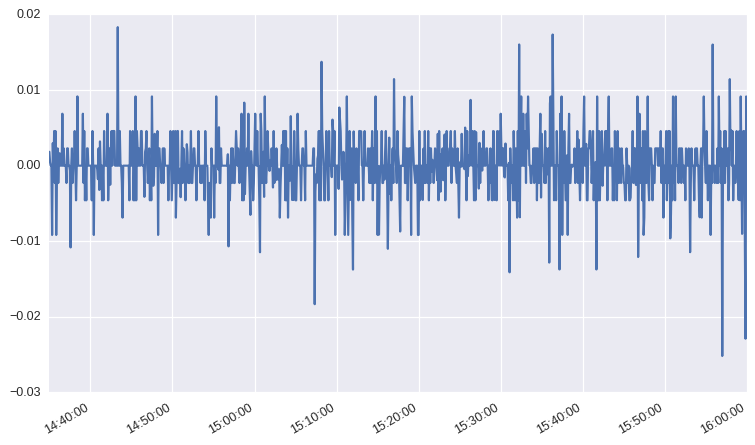

In [61]:
figure = returns.plot()

The default set of options produces a model with a constant mean, GARCH(1,1) conditional variance and normal errors.

In [67]:
from arch import arch_model
am = arch_model(returns) 
res = am.fit(update_freq=10)
print(res.summary())

Inequality constraints incompatible    (Exit mode 4)
            Current function value: -3839.03035008
            Iterations: 6
            Function evaluations: 46
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  close   R-squared:                      -0.572
Mean Model:             Constant Mean   Adj. R-squared:                 -0.572
Vol Model:                      GARCH   Log-Likelihood:                3839.03
Distribution:                  Normal   AIC:                          -7670.06
Method:            Maximum Likelihood   BIC:                          -7650.43
                                        No. Observations:                 1000
Date:                Fri, Aug 26 2016   Df Residuals:                      996
Time:                        18:45:20   Df Model:                            4
                                   Mean Model                                  
      

/home/octo/anaconda2/envs/PyAlgo/lib/python2.7/site-packages/arch/univariate/base.py:510: ConvergenceWarning: 
The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


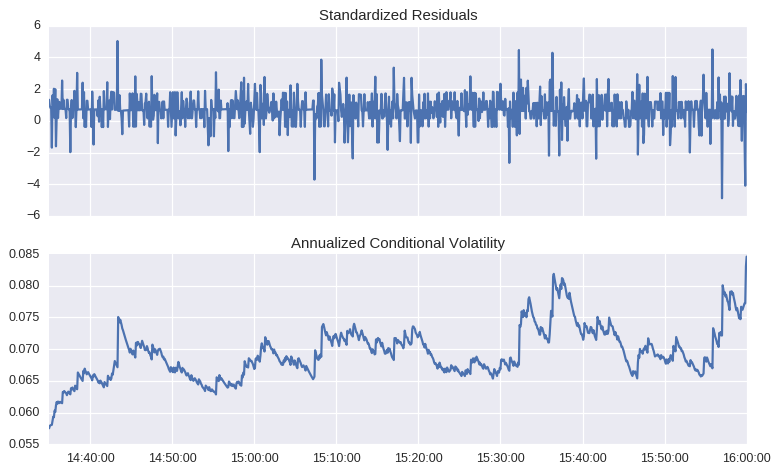

In [66]:
fig = res.plot(annualize='D')

GJR-GARCH

In [68]:
am = arch_model(returns, p=1, o=1, q=1)
res = am.fit(update_freq=10, disp='off')
print(res.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                  close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                4094.86
Distribution:                  Normal   AIC:                          -8179.72
Method:            Maximum Likelihood   BIC:                          -8155.18
                                        No. Observations:                 1000
Date:                Fri, Aug 26 2016   Df Residuals:                      995
Time:                        18:45:27   Df Model:                            5
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
mu         5.8724e-05  3.556e-07    165.140      0.0

/home/octo/anaconda2/envs/PyAlgo/lib/python2.7/site-packages/arch/univariate/base.py:510: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


TARCH/ZARCH

In [71]:
am = arch_model(returns, p=1, o=1, q=1, power=0.8)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     55,   Neg. LLF: -4091.79712835
Iteration:     10,   Func. Count:     96,   Neg. LLF: -4096.08730178
Iteration:     15,   Func. Count:    134,   Neg. LLF: -4096.70725304
Iteration:     20,   Func. Count:    169,   Neg. LLF: -4096.70899197
Iteration:     25,   Func. Count:    208,   Neg. LLF: -4096.70907111
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -4096.70926837
            Iterations: 27
            Function evaluations: 241
            Gradient evaluations: 27
               Constant Mean - Asym. Power GARCH (power: 0.8) Model Results               
Dep. Variable:                              close   R-squared:                      -0.000
Mean Model:                         Constant Mean   Adj. R-squared:                 -0.000
Vol Model:         Asym. Power GARCH (power: 0.8)   Log-Likelihood:                4096.71
Distribution:                              Normal   AIC:                          -

Student's T Errors

Financial returns are often heavy tailed, and a Student's T distribution is a simple method to capture this feature. The call to arch changes the distribution from a Normal to a Students's T.

The standardized residuals appear to be heavy tailed with an estimated degree of freedom near 10. The log-likelihood also shows a large increase.

In [82]:
am = arch_model(returns, p=1, o=1, q=1, power=0.7, dist='StudentsT')
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     56,   Neg. LLF: 3378.61744536
Iteration:     10,   Func. Count:    103,   Neg. LLF: 2777.30375159
Iteration:     15,   Func. Count:    160,   Neg. LLF: 4127.25340268
Iteration:     20,   Func. Count:    210,   Neg. LLF: -2453.71910125
Iteration:     25,   Func. Count:    263,   Neg. LLF: 5633.29862241
Iteration:     30,   Func. Count:    307,   Neg. LLF: 4226.24008041
Iteration:     35,   Func. Count:    369,   Neg. LLF: 2632.57285233
Iteration:     40,   Func. Count:    413,   Neg. LLF: 2587.96406494
Iteration:     45,   Func. Count:    457,   Neg. LLF: 2432.75320326
Iteration:     50,   Func. Count:    507,   Neg. LLF: 2432.59970563
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2432.59970549
            Iterations: 54
            Function evaluations: 518
            Gradient evaluations: 50
               Constant Mean - Asym. Power GARCH (power: 0.7) Model Results               
Dep. Variable:       

In [86]:
fixed_res = am.fix([2.32, 0.15, 0.0, 2, 0.0, 3.5])
print(fixed_res.summary())

               Constant Mean - Asym. Power GARCH (power: 0.7) Model Results               
Dep. Variable:                              close   R-squared:                          --
Mean Model:                         Constant Mean   Adj. R-squared:                     --
Vol Model:         Asym. Power GARCH (power: 0.7)   Log-Likelihood:               -2430.40
Distribution:            Standardized Student's t   AIC:                           4872.80
Method:                 User-specified Parameters   BIC:                           4902.25
                                                    No. Observations:                 1000
Date:                            Fri, Aug 26 2016                                         
Time:                                    18:57:18                                         
      Mean Model     
                 coef
---------------------
mu             2.3200
   Volatility Model  
                 coef
---------------------
omega          0.1500
alpha

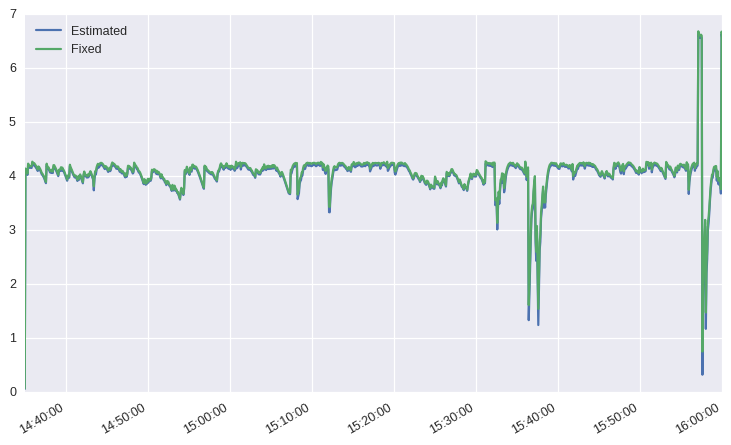

In [87]:
import pandas as pd
df = pd.concat([res.conditional_volatility,fixed_res.conditional_volatility],1)
df.columns = ['Estimated', 'Fixed']
df.plot()

Building a Model From Components
Models can also be systematically assembled from the three model components:

A mean model (arch.mean)
Zero mean (ZeroMean) - useful if using residuals from a model estimated separately
Constant mean (ConstantMean) - common for most liquid financial assets
Autoregressive (ARX) with optional exogenous regressors
Heterogeneous (HARX) autoregression with optional exogenous regressors
Exogenous regressors only (LS)
A volatility process (arch.volatility)
ARCH (ARCH)
GARCH (GARCH)
GJR-GARCH (GARCH using o argument)
TARCH/ZARCH (GARCH using power argument set to 1)
Power GARCH and Asymmetric Power GARCH (GARCH using power)
Heterogeneous ARCH (HARCH)
Parameterless Models
Exponentially Weighted Moving Average Variance, known as RiskMetrics (EWMAVariance)
Weighted averages of EWMAs, known as the RiskMetrics 2006 methodology (RiskMetrics2006)
A distribution (arch.distribution)
Normal (Normal)
Standardized Students's T (StudentsT)

Mean Models
The first choice is the mean model. For many liquid financial assets, a constant mean (or even zero) is adequate.

In [89]:
from arch.univariate import ARX
ar = ARX(returns, lags = [1,5,10])
print(ar.fit().summary())

                     AR - Constant Variance Model Results                     
Dep. Variable:                  close   R-squared:                       0.023
Mean Model:                        AR   Adj. R-squared:                  0.020
Vol Model:          Constant Variance   Log-Likelihood:                4057.94
Distribution:                  Normal   AIC:                          -8105.88
Method:            Maximum Likelihood   BIC:                          -8081.39
                                        No. Observations:                  990
Date:                Fri, Aug 26 2016   Df Residuals:                      985
Time:                        19:04:05   Df Model:                            5
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const      9.4567e-05  1.283e-04      0.737      0.4

Volatility Processes

Volatility processes can be added a a mean model using the volatility property. This example adds an ARCH(5) process to model volatility. The arguments iter and disp are used in fit() to suppress estimation output.

In [90]:
from arch.univariate import ARCH, GARCH
ar.volatility = ARCH(p=5)
res = ar.fit(update_freq=0, disp='off')
print(res.summary())

                           AR - ARCH Model Results                            
Dep. Variable:                  close   R-squared:                       0.023
Mean Model:                        AR   Adj. R-squared:                  0.020
Vol Model:                       ARCH   Log-Likelihood:                4060.93
Distribution:                  Normal   AIC:                          -8101.86
Method:            Maximum Likelihood   BIC:                          -8052.88
                                        No. Observations:                  990
Date:                Fri, Aug 26 2016   Df Residuals:                      980
Time:                        19:14:14   Df Model:                           10
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const      8.2729e-05  1.498e-04      0.552      0.5

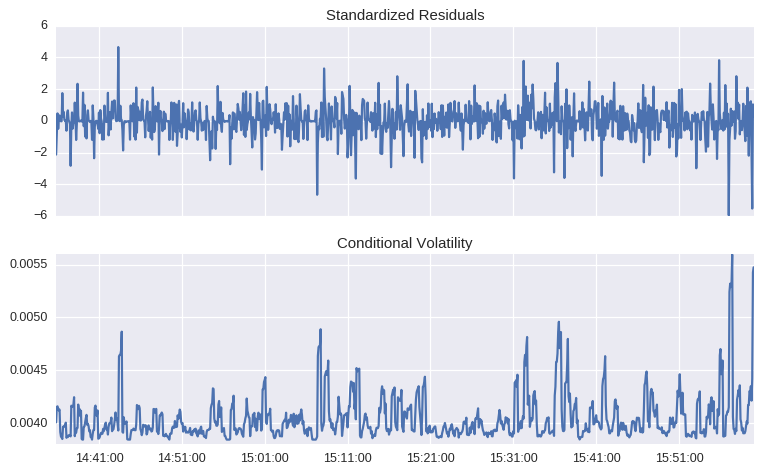

In [91]:
fig = res.plot()

Distributions

Finally the distribution can be changed from the default normal to a standardized Student's T using the distribution property of a mean model.

The Student's t distribution improves the model, and the degree of freedom is estimated to be near 8.

In [94]:
from arch.univariate import StudentsT
ar.distribution = StudentsT()
res = ar.fit(update_freq=5, disp='off')
print(res.summary())

                              AR - ARCH Model Results                               
Dep. Variable:                        close   R-squared:                      -4.829
Mean Model:                              AR   Adj. R-squared:                 -4.846
Vol Model:                             ARCH   Log-Likelihood:                3169.17
Distribution:      Standardized Student's t   AIC:                          -6316.34
Method:                  Maximum Likelihood   BIC:                          -6262.46
                                              No. Observations:                  990
Date:                      Fri, Aug 26 2016   Df Residuals:                      979
Time:                              19:16:43   Df Model:                           11
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
---------------------------------------------------------------------------

/home/octo/anaconda2/envs/PyAlgo/lib/python2.7/site-packages/arch/univariate/base.py:510: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


In [96]:
from collections import OrderedDict

res_normal = arch_model(returns).fit(disp='off')
res_t = arch_model(returns, dist='t').fit(disp='off')
res_skewt = arch_model(returns, dist='skewt').fit(disp='off')
lls = pd.Series(OrderedDict((('normal', res_normal.loglikelihood),
                 ('t', res_t.loglikelihood),
                 ('skewt', res_skewt.loglikelihood))))
print(lls)
params = pd.DataFrame(OrderedDict((('normal', res_normal.params),
                 ('t', res_t.params),
                 ('skewt', res_skewt.params))))
print(params)

/home/octo/anaconda2/envs/PyAlgo/lib/python2.7/site-packages/arch/univariate/base.py:510: ConvergenceWarning: 
The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/home/octo/anaconda2/envs/PyAlgo/lib/python2.7/site-packages/arch/univariate/base.py:510: ConvergenceWarning: 
The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/home/octo/anaconda2/envs/PyAlgo/lib/python2.7/site-packages/arch/univariate/base.py:510: ConvergenceWarning: 
The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


normal    3839.030350
t         4163.279431
skewt     4163.279431
dtype: float64
                normal             t         skewt
alpha[1]  1.032627e-02  1.000000e-02  1.000000e-02
beta[1]   9.696232e-01  9.700000e-01  9.700000e-01
lambda             NaN           NaN  0.000000e+00
mu       -2.984204e-03  8.480586e-05  8.480586e-05
nu                 NaN  5.483020e+00  5.483020e+00
omega     3.293481e-07  3.294761e-07  3.294761e-07


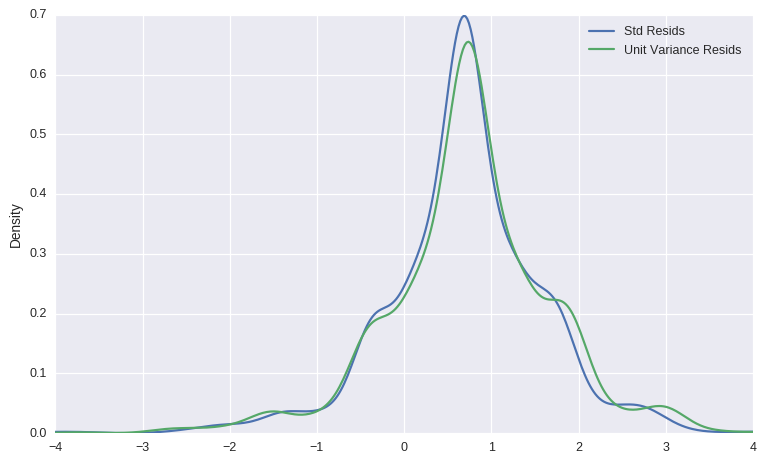

In [97]:
std_resid = res_normal.resid / res_normal.conditional_volatility
unit_var_resid = res_normal.resid / res_normal.resid.std()
df = pd.concat([std_resid, unit_var_resid],1)
df.columns = ['Std Resids', 'Unit Variance Resids']
df.plot(kind='kde', xlim=(-4,4))